# 1. Matrix Factorization for Network Embedding 

In [316]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from matplotlib import pyplot as plt 
np.random.seed(15)

In [317]:
#Load data
adjlist = nx.read_adjlist("karate_club.adjlist", nodetype=int)
karate_label = np.loadtxt("karate_label.txt")
node_number = nx.to_pandas_adjacency(G).columns

In [318]:
adj

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [319]:
adj = nx.to_numpy_array(adjlist)
label = karate_label[:,-1]

print(adj.shape)
print(label.shape)

(34, 34)
(34,)


In [320]:
#match the label
fix_label = []
for i in node_number:
    tem = karate_label[i][-1]
    fix_label.append(tem)

In [321]:
#defining P, Q for matrix factorizaiton
d= 4
P = np.random.random((4,34))
Q = np.random.random((4,34))

In [322]:
zuzv = np.dot(P.T,Q)
zuzv.shape

(34, 34)

In [323]:
# loss function
def loss(a,b):
    return np.sum((a-b)**2)

In [324]:
loss(zuzv,adj)

1057.929366546701

In [325]:
epoch = 1000
lr = 0.001

In [326]:
#Updating params 
loss_list = [0 for _ in range(epoch)]
for i in range(epoch):
    P -= lr *  np.dot(zuzv-adj,Q.T).T
    Q -= lr *  np.dot(zuzv-adj,P.T).T
    
    
    loss_list[i] = loss(zuzv,adj)
    zuzv = np.dot(P.T,Q)

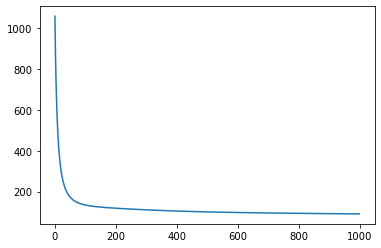

In [327]:
#plotting the loss
plt.plot(loss_list)

# T-SNE

- the membership number are located nearly when they have many relationship 
- it differs quite a lot when perplexity changes
- unlike the figure, label doesn't mean anyting (expressed by the color) 

In [328]:
ans = np.dot(adj,P.T)

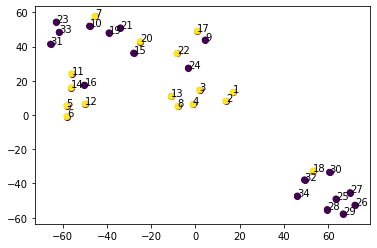

In [90]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100,perplexity=5)
transformed = model.fit_transform(ans)
xs = transformed[:,0]
ys = transformed[:,1]

for i in range(len(xs)):
    plt.scatter(xs[i],ys[i],c = node_number[i])
    plt.text(xs[i],ys[i],i+1)
plt.scatter(xs,ys,c=label)
#plt.text(xs,ys)

plt.show()


# Logistic Regression

In [426]:
ans.shape

(34, 4)

In [466]:
# define data_x, label y
x_data = ans

t_data = np.array(label).reshape(34,1)
print(x_data.shape)
print(t_data.shape)

(34, 4)
(34, 1)


In [467]:
#Shuffle
total = np.concatenate([x_data,t_data],axis = 1)
np.random.shuffle(total)

x_data = total[:,:-1]
t_data = total[:,-1]
t_data = np.array(t_data).reshape(34,1)

print(x_data.shape)
print(t_data.shape)

(34, 4)
(34, 1)


# SPLIT DATA

In [497]:
# Split data
portion = 0.3
tem = int(34 * portion)
x_test = x_data[34-tem:]
t_test = t_data[34-tem:]

x_data = x_data[:34-tem]
t_data = t_data[:34-tem]

print("train 데이터 수:",len(x_data))
print("test 데이터 수:",len(x_test))

train 데이터 수: 24
test 데이터 수: 0


In [498]:
w = np.random.rand(4,1)
b = np.random.rand(1)

In [499]:
print("w=",w," w.shape=", w.shape, " b=",b," b.shape=", b.shape)

w= [[0.86683402]
 [0.18925327]
 [0.72067929]
 [0.98029383]]  w.shape= (4, 1)  b= [0.90128012]  b.shape= (1,)


In [500]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
def loss_func(x, t):
    delta = 1e-7
    z=np.dot(x,w)+b
    y=sigmoid(z)
    return -np.sum(t*np.log(y+delta)+(1-t)*np.log((1-y)+delta))

In [501]:
def numerical_derivative(f, x):
    delta_x = 1e-4 #매우 작은 값
    grad = np.zeros_like(x) #수치미분된 값을 저장할 ndarray
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx=it.multi_index
        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x)
        
        x[idx] = tmp_val - delta_x
        fx2 = f(x)
        
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val
        it.iternext()
        
    return grad

def predict(x):
    z = np.dot(x,w) + b
    y = sigmoid(z)
    
    if y > 0.5: #0.5를 초과하면 1로 True, 이하면 0으로 False
        result = 1
    else:
        result = 0
        
    return result

In [502]:
learning_rate = 1e-2

f = lambda x : loss_func(x_data, t_data)

print("initial error value=", loss_func(x_data, t_data), "initial w=", w, "\nb=",b)

initial error value= 35.708143427014576 initial w= [[0.86683402]
 [0.18925327]
 [0.72067929]
 [0.98029383]] 
b= [0.90128012]


In [503]:
loss = []
for step in range(10000):
    w -= learning_rate *numerical_derivative(f,w)
    b -= learning_rate *numerical_derivative(f,b)
    if(step%10==0):
        l = loss_func(x_data, t_data)
        loss.append(l)

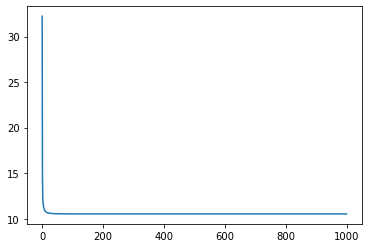

In [504]:
plt.plot(loss)

### TEST SET 

In [505]:
#Make Prediction
pred = []
for i in range(len(x_test)):
    tem = predict(x_test[i])
    pred.append(tem) 

### F1 -score

In [506]:
y = t_test #0은 정상(실력자), 1은 음치
y= y.flatten()
p = np.array(pred) #나의 예측


accuracy = np.mean(np.equal(y,p))
right = np.sum(y * p == 1)
precision = right / np.sum(p)
recall = right / np.sum(y)
f1 = 2 * precision*recall/(precision+recall)

print('accuracy',accuracy)
print('precision', precision)
print('recall', recall)
print('f1', f1)

accuracy nan
precision nan
recall nan
f1 nan


C:\Users\SIL\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\SIL\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-506-a931cae2b564>:8: RuntimeWarning: invalid value encountered in true_divide
  precision = right / np.sum(p)
<ipython-input-506-a931cae2b564>:9: RuntimeWarning: invalid value encountered in true_divide
  recall = right / np.sum(y)
